In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

In [ ]:
fb = nx.read_edgelist('/content/drive/MyDrive/PhD work/data/undirected networks/facebook/edges.txt', create_using = nx.Graph(), nodetype = int)

In [ ]:


print(nx.info(fb))



Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


In [ ]:
print(nx.is_connected(fb))

True


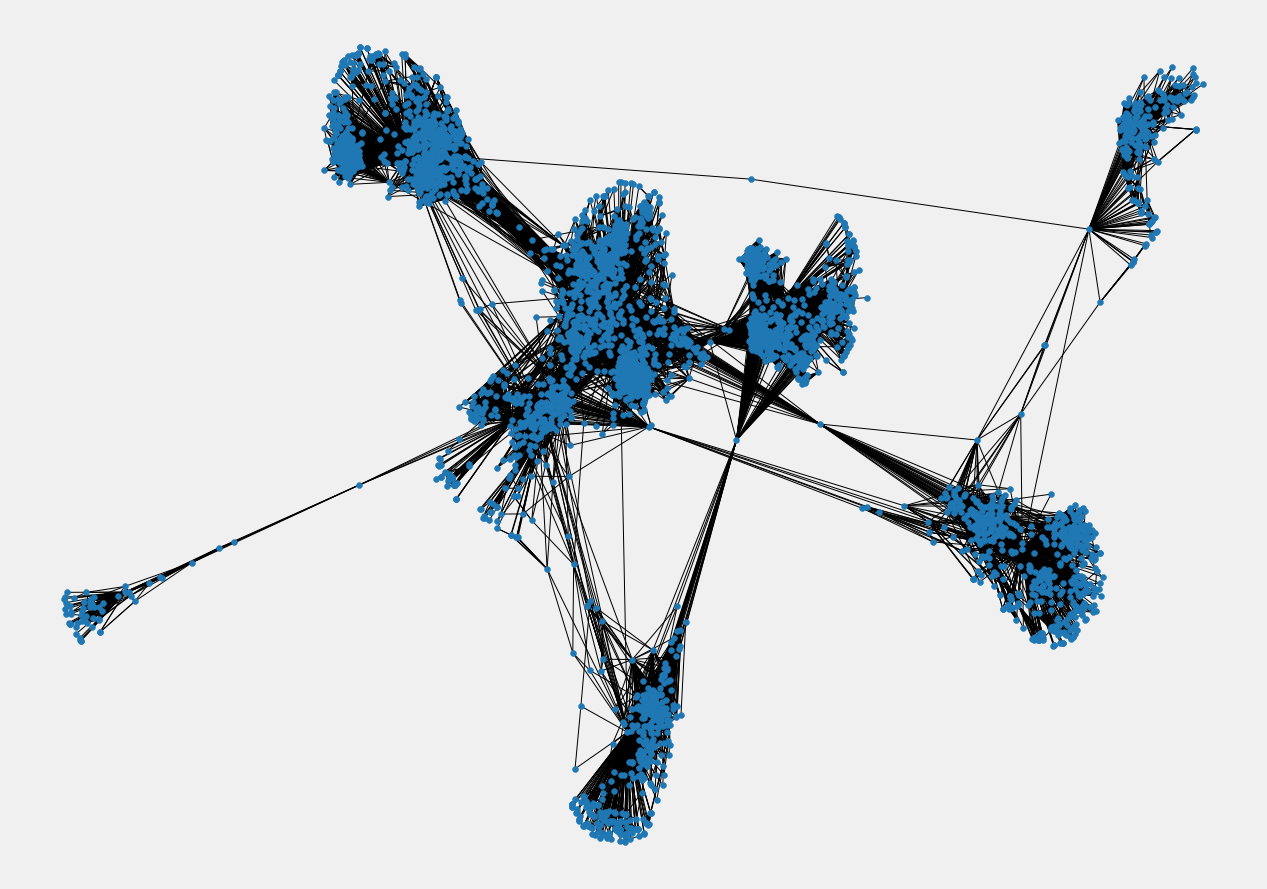

In [ ]:
# show network:
pos = nx.spring_layout(fb)

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 15)
plt.axis('off')
nx.draw_networkx(fb, pos, with_labels = False, node_size = 35)
plt.show()

In [ ]:
max(deg)

1045.0

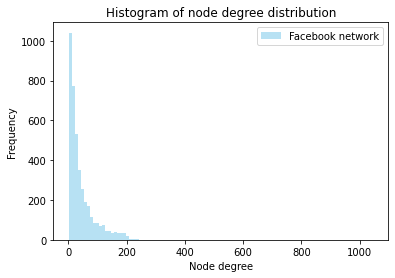

In [ ]:
# node degree distribution:
deg = np.zeros((fb.number_of_nodes()))
        
j = 0        
for nd in fb.nodes():
    deg[j] = fb.degree(nd)
    j = j + 1

plt.figure(1)
plt.hist(deg, histtype='stepfilled', color = "skyblue", alpha=0.6, label = 'Facebook network', bins=100)

plt.title('Histogram of node degree distribution')
plt.xlabel('Node degree')
plt.ylabel('Frequency')


# plt.title('Histogram of node degree distribution', fontsize = 60)
# plt.xlabel('Node degree', fontsize = 60)
# plt.ylabel('Frequency', fontsize = 60)
# plt.rcParams['figure.figsize'] = [10, 8]

# # We change the fontsize of minor ticks label 
# plt.tick_params(axis='both', which='major', labelsize=40)
# plt.tick_params(axis='both', which='minor', labelsize=40)
# plt.rc('legend',fontsize=40)


plt.legend()
plt.show()

In [ ]:
np.mean(deg)

43.69101262688784

In [ ]:
np.median(deg)

25.0

In [ ]:
scipy.stats.mode(deg)

ModeResult(mode=array([8.]), count=array([111]))

In [ ]:
# # low rankness:
from scipy.sparse.csgraph import dijkstra

A = nx.adjacency_matrix(fb)
D = np.array(dijkstra(A))
np.savetxt('/content/drive/MyDrive/PhD work/data/undirected networks/facebook/dHp.txt', D)

In [2]:
D = np.loadtxt('/content/drive/MyDrive/PhD work/data/undirected networks/facebook/dHp.txt')
[u,S,vt] = np.linalg.svd(D)
ln_sv = S
ln_sv1 = np.log(S)

In [3]:
D = np.loadtxt('/content/drive/MyDrive/PhD work/data/undirected networks/virgili emails/dHp.txt')
[u,S,vt] = np.linalg.svd(D)
ln_sv = S
ln_sv2 = np.log(S)

In [4]:
D = np.loadtxt('/content/drive/MyDrive/PhD work/data/undirected networks/train bombing/dHp.txt')
[u,S,vt] = np.linalg.svd(D)
ln_sv = S
ln_sv3 = np.log(S)

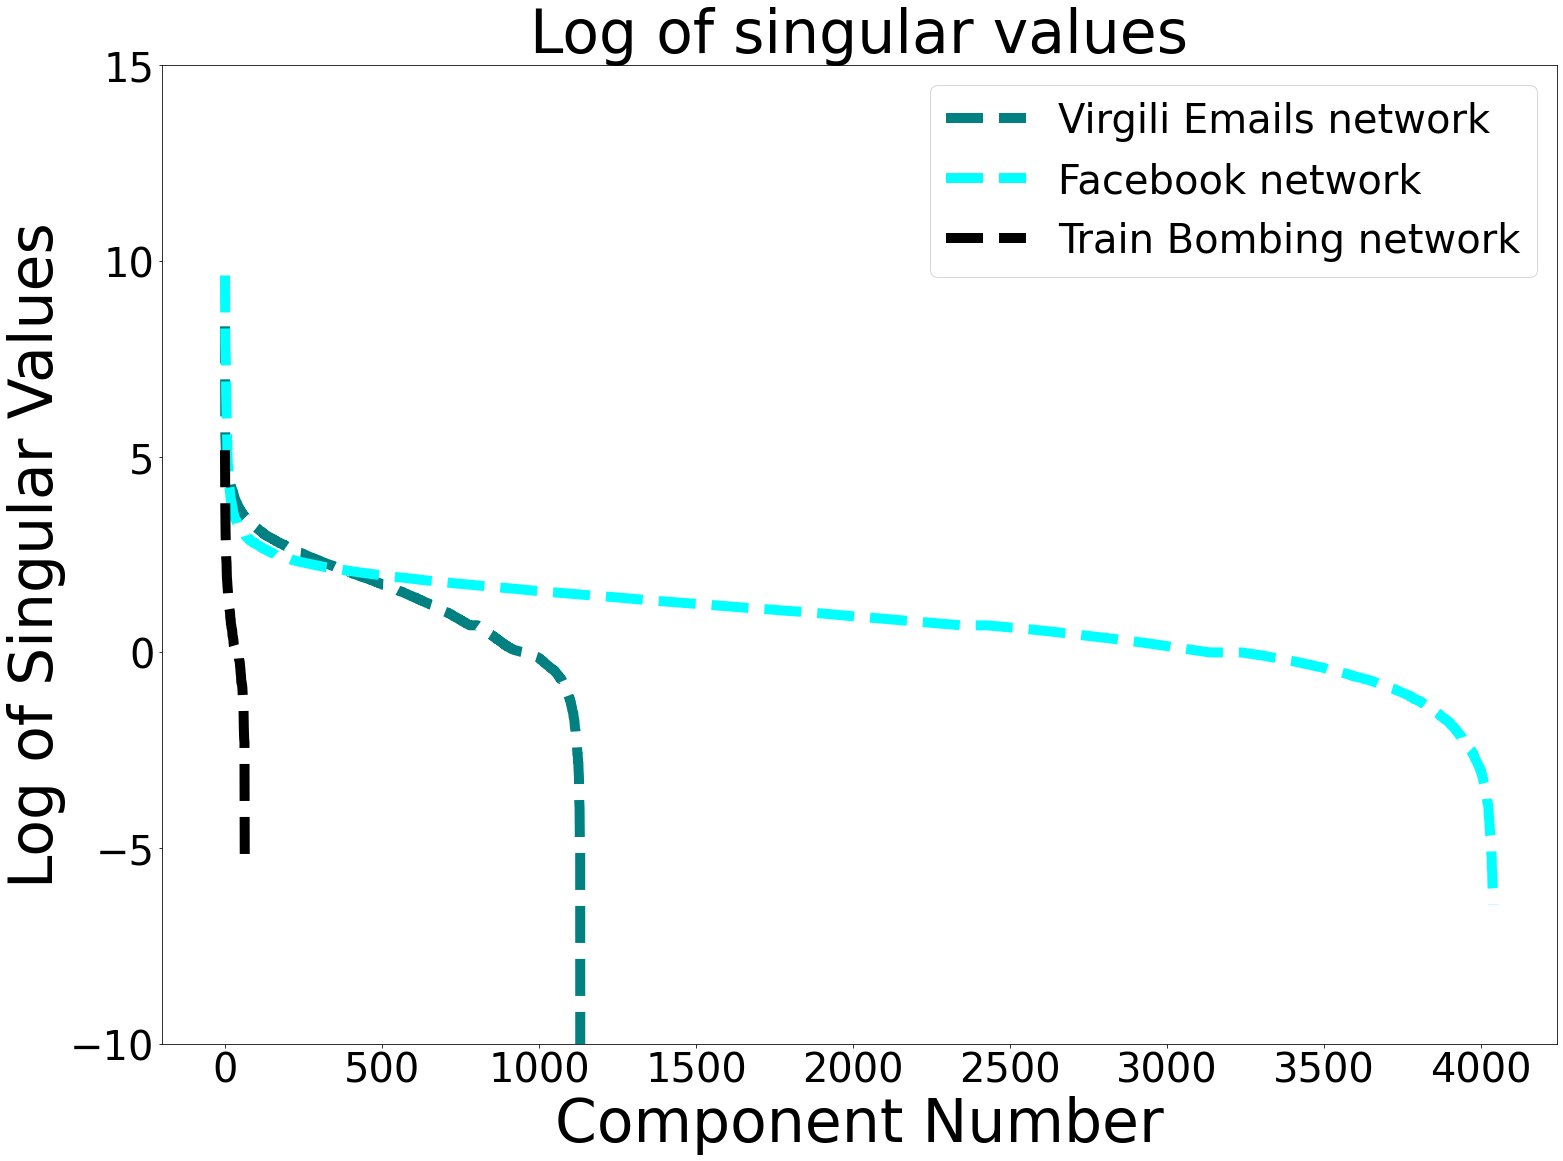

In [15]:

plt.plot( ln_sv2, color='teal', linewidth=10, linestyle='--', markersize = 30,  label='Virgili Emails network')
plt.plot( ln_sv1, color='cyan', linewidth=10, linestyle='--', markersize = 30,  label='Facebook network')
plt.plot( ln_sv3, color='black', linewidth=10, linestyle='--', markersize = 30, label='Train Bombing network')

plt.legend()
# plt.xscale('log')
plt.title('Log of singular values', fontsize = 60)
plt.xlabel('Component Number', fontsize = 60)
plt.ylabel('Log of Singular Values', fontsize = 60)
plt.rcParams['figure.figsize'] = [25, 18]
plt.ylim([-10, 15])

# We change the fontsize of minor ticks label 
plt.tick_params(axis='both', which='major', labelsize=40)
plt.tick_params(axis='both', which='minor', labelsize=40)
plt.rc('legend',fontsize=40)

plt.show()